# Supervised learning: simple models

### Outline <a name = 'outline'></a>
* [Data generation](#datasets) 
    * [Make datasets](#makedata)
    * [Load toy dadasets](#loaddata)
    * [Fetch real world datasets](#fetchdata)
    * [Generate fake datasets](#fakedata)
    * [Read data from files](#readdata)
* [Decision stump & decision trees](#trees)
* [Distance-based models](#knn)
* [Naive Baiyes model](#baiyes)

In [ ]:
#!pip install faker

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.pyplot.style.use('ggplot')

import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus 
from faker import Faker


from IPython.display import Image
from sklearn import datasets, metrics, model_selection, naive_bayes, neighbors, tree


In [ ]:
%matplotlib inline

## Data generation<a name = 'datasets'> </a>

### Sklearn datasets
documentation: http://scikit-learn.org/stable/datasets/

[**Functions for generation of classsification or regression problem**](#makedata)
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

In [ ]:
circles = datasets.make_circles()

In [ ]:
type(circles)

tuple

In [ ]:
circles[1]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [ ]:
print(f'target: {circles[1][:10]}')
print(f'features: {circles[0][:10]}')

target: [1 0 0 0 0 1 1 1 1 0]
features: [[-0.05023242  0.79842138]
 [ 0.18738131  0.98228725]
 [ 0.9921147   0.12533323]
 [ 0.96858316  0.24868989]
 [ 0.06279052 -0.99802673]
 [-0.77486653  0.19895191]
 [-0.79369176  0.10026659]
 [ 0.2472136  -0.76084521]
 [ 0.79369176 -0.10026659]
 [ 0.42577929 -0.90482705]]


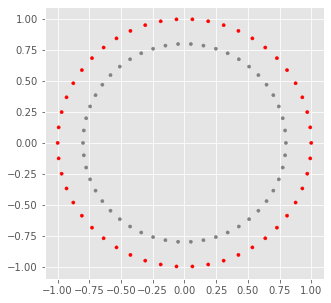

In [ ]:
data_tuple = circles

plt.figure(figsize = (5, 5))

plt.scatter(data_tuple[0][:,0], 
            data_tuple[0][:,1], 
            c = data_tuple[1], 
            cmap = matplotlib.colors.ListedColormap(['red', 'grey']),
           s = 10)

plt.show()

In [ ]:
noisy_circles = datasets.make_circles(noise = 0.1)

In [ ]:
def plot_2d_dataset(data_tuple, size = (5,5), 
                    colors:list = ['red', 'black']):
    """Function to generate 2d plot for plain datasets"""
    
    #set size
    plt.figure(figsize = size)
    
    #build figure
    plt.scatter(list(map(lambda x: x[0], data_tuple[0])), 
                list(map(lambda x: x[1], data_tuple[0])), 
                c = data_tuple[1], 
                cmap = matplotlib.colors.ListedColormap(colors))
    
    #show figure
    plt.show()

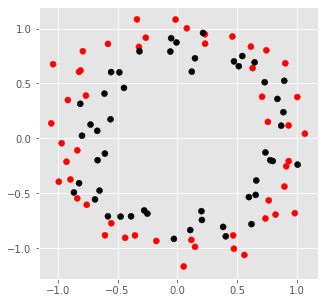

In [ ]:
plot_2d_dataset(noisy_circles) #, colors = ['violet', 'brown'])

In [ ]:
?plot_2d_dataset

[back to outline](#outline)

[**Functions for toy datasets loading **](#loaddata)
* load_iris
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

**Iris Plants Data Set**

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(f'target names: {iris.target_names}\n')
print(f'feature names: {iris.feature_names}')

target names: ['setosa' 'versicolor' 'virginica']

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Handwritten Digits Data Set**

In [ ]:
digits = datasets.load_digits()

In [ ]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
print(f'example of target: {digits.target[0]}')
print(f'example of features: {digits.data[0]}')

example of target: 0
example of features: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


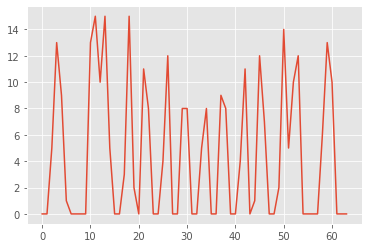

In [ ]:
plt.plot(digits.data[0])
plt.show()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

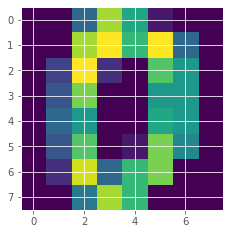

In [ ]:
plt.figure(figsize = (8, 8))

plt.subplot(1, 2, 2)
plt.imshow(digits.images[0])

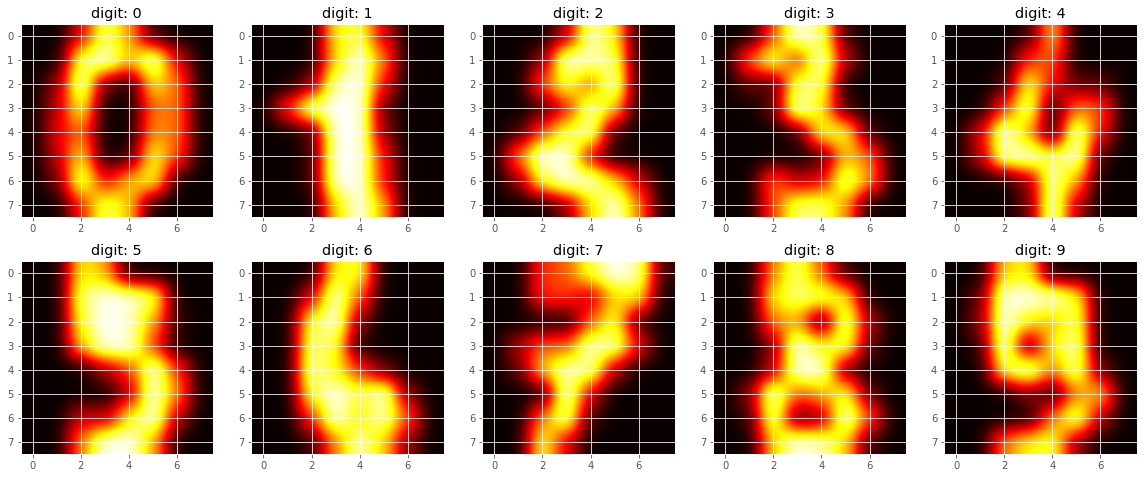

In [ ]:
plt.figure(figsize = (20, 8))

for plot_number, plot in enumerate(digits.images[:10]):
    plt.subplot(2, 5, plot_number + 1)
    plt.imshow(plot, cmap = 'hot', interpolation = 'gaussian')
    plt.title('digit: ' + str(digits.target[plot_number]))

[back to outline](#outline)

[**Functions for larger real world datasets loading **](#fetchdata)
* fetch_mldata
* fetch_kddcup99
* fetch_20newsgroups
* fetch_california_housing
* fetch_lfw_people
* etc

In [ ]:
news_groups = datasets.fetch_20newsgroups(subset = 'test', 
                                          random_state = 0)

In [ ]:
news_groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
print(f'Target names: {news_groups.target_names}')

Target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print(f'example of target: {news_groups.target_names[news_groups.target[0]]}')
print(f'example of data piece: {news_groups.data[0]}')

example of target: rec.autos
example of data piece: From: mliggett@silver.ucs.indiana.edu (matthew liggett)
Subject: Re: V4 V6 V8 V12 Vx?
Nntp-Posting-Host: silver.ucs.indiana.edu
Organization: Indiana University
Lines: 32

In <1993Apr23.132214.6755@cs.tulane.edu> finnegan@nrlssc.navy.mil writes:

>In article <Apr22.202724.24131@engr.washington.edu>
>eliot@stalfos.engr.washington.edu (eliot) writes:
>>
>>the subarus all use 180 degree vees in their engines..  :-)
>>
>>
>>eliot

>Wouldn't that make them an I4?  Or would they 
>really be an _4 (henceforth referred to as
>"underscore 4")?

horizontally opposed 4.
or 'boxer'
great idea, actually..
smooth running; low center of gravity..
also used in some honda gullwings, corvairs, porsches (others?)
...

>Kenneth
>finnegan@nrlssc.navy.mil




-- 
/-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-=*=-\
| |\/|  __   -=> mliggett@silver.ucs.indiana.edu <=- (mliggett@iugold.bitnet  |
* |  |/\||   'junk' collector, toys 

[back to outline](#outline)

[**Fake data generation**](#fakedata)

In [ ]:
fake_generator = Faker()

In [ ]:
fake_generator.pydict(nb_elements = 10)

{'song': 'hqilVeIdXmCazROuQQWH',
 'Mr': 'mnelson@wood.com',
 'senior': 'BgTaCmlbjHVnHzSSyRtv',
 'industry': datetime.datetime(1998, 1, 8, 11, 5, 50),
 'trial': 'http://www.garcia.com/',
 'sing': Decimal('-3445927.76231843'),
 'process': 5679,
 'seven': 'bvGyHjrAbmVnCbUhhipY',
 'job': Decimal('997848.926382968'),
 'above': Decimal('-31548420955323.4'),
 'knowledge': Decimal('-7624844815486.84')}

In [ ]:
fake_generator.pylist(nb_elements = 3)

['trzfjXjboLaCsZHKlyGj', 'zbQrVTArWLckMIqowVfw']

In [ ]:
fake_generator.pystr()

'zbvzwNFETdUnBsjfOhXO'

In [ ]:
#fake dataset with user data
pd.DataFrame([fake_generator.simple_profile() for profile_num in range(10)])

,username,name,sex,address,mail,birthdate
0,snyderangela,Thomas Lewis,M,"6390 Natasha Pike\nHendersonland, UT 42520",donaldroth@gmail.com,2009-01-29
1,brandoncarey,Kathy Harris,F,"574 Foster Shore Apt. 553\nNorth Codytown, KS ...",bensonbrent@gmail.com,2007-08-11
2,scottmichael,Charles Schultz,M,"459 Hernandez Way\nNew Taylor, NV 77900",mitchellweaver@gmail.com,1993-12-30
3,nicole61,Sheila Thompson,F,Unit 2460 Box 5128\nDPO AP 67129,stephanie16@hotmail.com,1923-02-08
4,valerie52,Debra Myers,F,"0380 Emily Walk Suite 818\nBethanyfurt, OH 07379",brownamanda@hotmail.com,1928-09-07
5,watkinsgabriel,Mark Copeland,M,"9055 Matthew Alley Apt. 767\nJenniferburgh, OK...",yroberson@hotmail.com,1968-04-20
6,garrettsherri,Kristen Burns,F,"123 Carlos Mountain\nKellyville, MT 10756",hutchinsonangela@yahoo.com,1987-07-27
7,ashley74,Lauren Robinson,F,"664 Jill Route Suite 318\nEast Williamstad, RI...",crystal38@yahoo.com,2011-03-10
8,michael01,Benjamin Castillo,M,"12750 Jon Bypass\nHollyland, RI 74962",devinbaker@hotmail.com,1984-04-15
9,patrickdarren,Amber Browning,F,"3598 David Mount Apt. 583\nAnthonytown, VT 91777",rwalker@hotmail.com,1959-05-13


In [ ]:
print(f'Female name: {fake_generator.name_female()}')
print(f'Male name: {fake_generator.name_male()}')
print(f'Company: {fake_generator.bs()}')
print(f'Country: {fake_generator.country()}')
print(f'City: {fake_generator.city()}')
print(f'Email: {fake_generator.company_email()}')
print(f'Android platform token: {fake_generator.android_platform_token()}')
print(f'Geo coordinates: {fake_generator.latlng()}')

Female name: Joanna Thompson
Male name: Eric Pearson
Company: enhance compelling info-mediaries
Country: Kuwait
City: West Taylor
Email: smithsarah@hamilton.com
Android platform token: Android 3.2.2
Geo coordinates: (Decimal('28.9530945'), Decimal('-128.172597'))


In [ ]:
ru_fake_generator = Faker(['ru_Ru'])

In [ ]:
print(f'Female name: {ru_fake_generator.name_female()}')
print(f'Male name: {ru_fake_generator.name_male()}')
print(f'Company: {ru_fake_generator.bs()}')
print(f'Country: {ru_fake_generator.country()}')
print(f'City: {ru_fake_generator.city()}')
print(f'Email: {ru_fake_generator.company_email()}')
print(f'Android platform token: {ru_fake_generator.android_platform_token()}')
print(f'Geo coordinates: {ru_fake_generator.latlng()}')

Female name: Щукина Ангелина Ильинична
Male name: Жуков Эмиль Артемьевич
Company: Синтез передовых систем снабжения
Country: Греция
City: д. Неплюевка
Email: pahom2015@npo.net
Android platform token: Android 4.0.2
Geo coordinates: (Decimal('-78.534995'), Decimal('-169.293507'))


In [ ]:
#fake dataset with user data
pd.DataFrame([ru_fake_generator.simple_profile() for profile_num in range(10)])

,username,name,sex,address,mail,birthdate
0,selivan2015,Регина Борисовна Доронина,F,"с. Можга, ул. Железнодорожная, д. 847, 562429",ippolit_2011@mail.ru,1947-09-17
1,ybirjukov,тов. Мартынов Ладимир Глебович,M,"д. Партизанск, пр. Беляева, д. 7 стр. 521, 024152",panfilovaivanna@yahoo.com,1938-04-11
2,ljubimefimov,Аникей Августович Егоров,M,"клх Северо-Курильск, бул. Чапаева, д. 3/5, 389185",kazimir_85@hotmail.com,1923-12-23
3,anikeefimov,Брагина Пелагея Ивановна,F,"ст. Шатки, пер. Проезжий, д. 8/2, 161990",crjabov@mail.ru,1909-05-09
4,avtonomrjabov,Попов Виталий Тимурович,M,"п. Бийск, алл. Союзная, д. 7 стр. 3, 138103",orehovevlampi@mail.ru,1926-12-29
5,emmanuil_1980,Поликарп Бенедиктович Осипов,M,"г. Верхотурье, пер. Сельский, д. 3 стр. 155, 4...",eduardlobanov@yandex.ru,1983-11-29
6,poljakovnazar,Мартынов Олимпий Елизарович,M,"клх Камышин, ш. Красноармейское, д. 82 к. 260,...",longin1974@hotmail.com,2017-09-19
7,ilinnikon,Тимофей Брониславович Миронов,M,"п. Ессентуки, пр. Ленинский, д. 52 к. 3, 457025",rodion1975@gmail.com,1933-09-21
8,emeljan2014,Евстигней Зиновьевич Петухов,M,"д. Плесецк, алл. Локомотивная, д. 6/4 к. 466, ...",mechislavjakushev@yandex.ru,1919-10-18
9,hsuhanova,г-жа Мартынова Ульяна Георгиевна,F,"ст. Оленегорск (Якут.), алл. Украинская, д. 41...",osip1995@yandex.ru,1957-10-23


[back to outline](#outline)

[**Reading data from local files**](#readdata)

In [ ]:
bikes = pd.read_csv('bikes_demand_prediction.csv', header =  0, sep = ',')

In [ ]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
bikes.loc[5:15, ['datetime', 'count']]

,datetime,count
5,2011-01-01 05:00:00,1
6,2011-01-01 06:00:00,2
7,2011-01-01 07:00:00,3
8,2011-01-01 08:00:00,8
9,2011-01-01 09:00:00,14
10,2011-01-01 10:00:00,36
11,2011-01-01 11:00:00,56
12,2011-01-01 12:00:00,84
13,2011-01-01 13:00:00,94
14,2011-01-01 14:00:00,106


In [ ]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


[back to outline](#outline)

## Decision stump & decision trees <a name = 'trees'></a>

In [ ]:
#data generation
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant = 0, 
                                                      n_clusters_per_class = 1, 
                                                      random_state = 0)

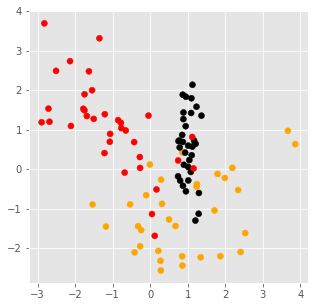

In [ ]:
plot_2d_dataset(classification_problem, colors = ['red', 'black', 'orange'])

In [ ]:
#data train/test split
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1],
    test_size = 0.3,
    random_state = 0)

In [ ]:
#model training
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 1)
clf.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
predictions = clf.predict(test_data)
#metrics.accuracy_score(test_labels, predictions)

In [ ]:
metrics.accuracy_score(test_labels, predictions)

0.6666666666666666

In [ ]:
test_labels

array([2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0,
       1, 0, 2, 2, 1, 0, 2, 0])

In [ ]:
predictions

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
#helper functions for separating surface visualization

colors = matplotlib.colors.ListedColormap(['red', 'black', 'orange'])
light_colors = matplotlib.colors.ListedColormap(['lightcoral', 'silver', 'bisque'])

def get_meshgrid(data, step = .05, border = .5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))


def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(
        estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    
    plt.pcolormesh(xx, 
                      yy, 
                      mesh_predictions, 
                      cmap = light_colors)
    
    plt.scatter(train_data[:, 0], 
                   train_data[:, 1], 
                   c = train_labels, 
                   s = 100, 
                   cmap = colors)
    
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(
        train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    #xx, yy = get_meshgrid(test_data)
    #mesh_predictions = np.array(
    #    estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, 
                   yy, 
                   mesh_predictions, 
                   cmap = light_colors)
    
    plt.scatter(test_data[:, 0], 
                test_data[:, 1], 
                c = test_labels, 
                s = 100, 
                cmap = colors)
    
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(
        test_labels, estimator.predict(test_data))))

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


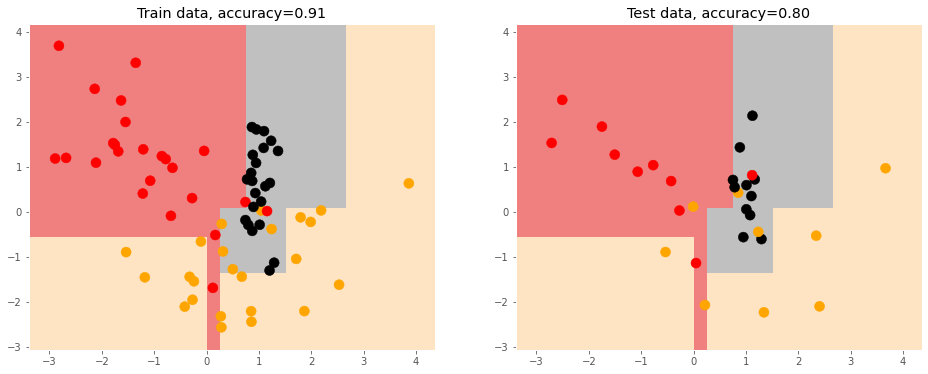

In [ ]:
estimator = tree.DecisionTreeClassifier(random_state = 0, max_depth = 4) #, max_depth = 4)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
dot_data = tree.export_graphviz(estimator, out_file="graphviz/small_tree.out", 
                         feature_names=['x', 'y'],  
                         class_names=['red', 'black', 'orange'],  
                         filled=True, rounded=True,  
                         special_characters=True)

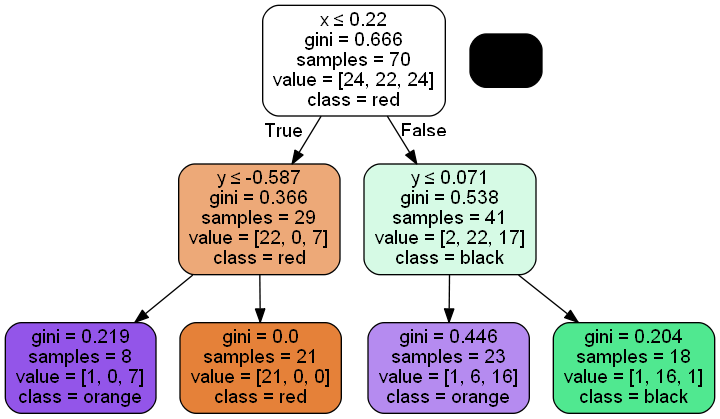

In [ ]:
graph = pydotplus.graphviz.graph_from_dot_file("graphviz/small_tree.out")  
Image(graph.create_png())

[back to outline](#outline)

## Distance-based models <a name = 'knn'></a>

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


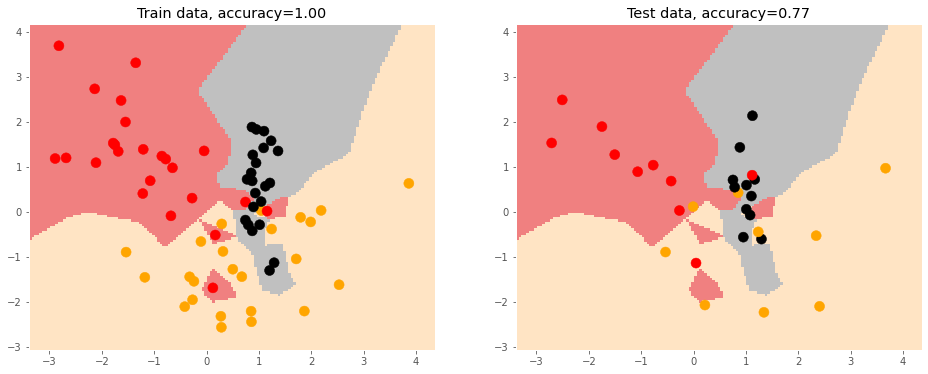

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


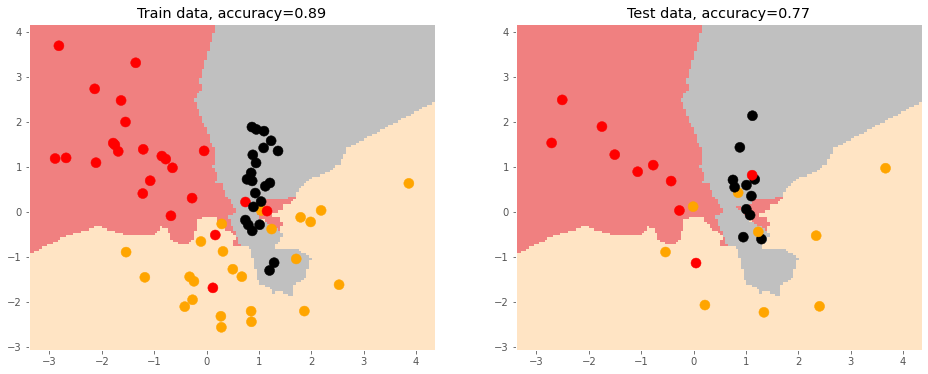

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


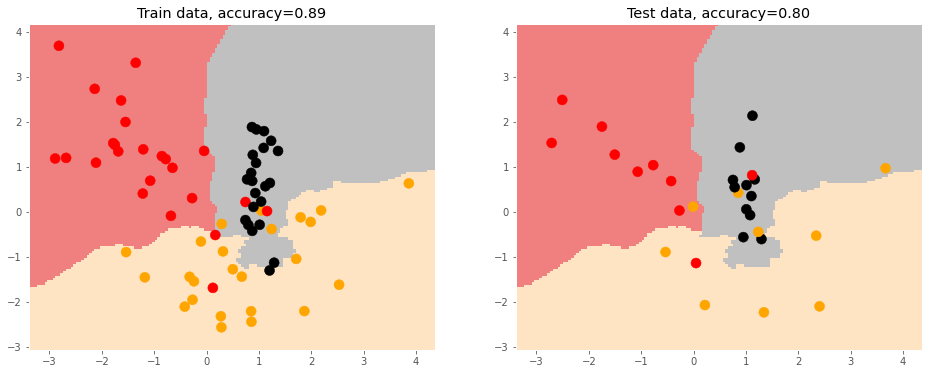

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


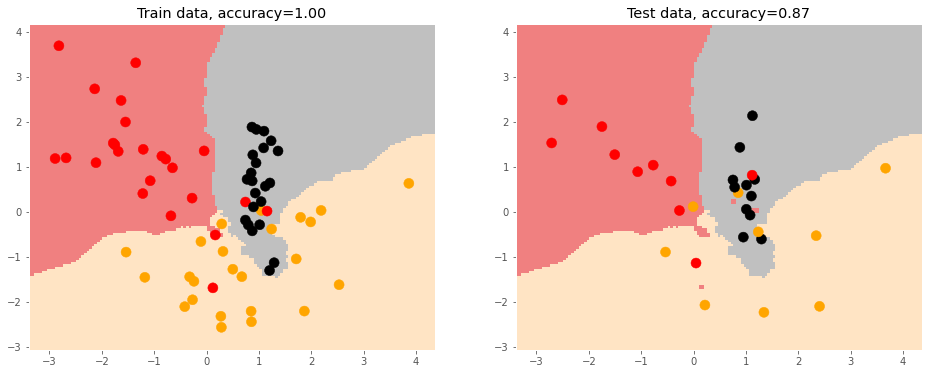

In [ ]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

[back to outline](#outline)

## Naive Baiyes model <a name = 'baiyes'></a>

In [ ]:
estimator = naive_bayes.GaussianNB()
estimator.fit(train_data, train_labels)

GaussianNB()

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


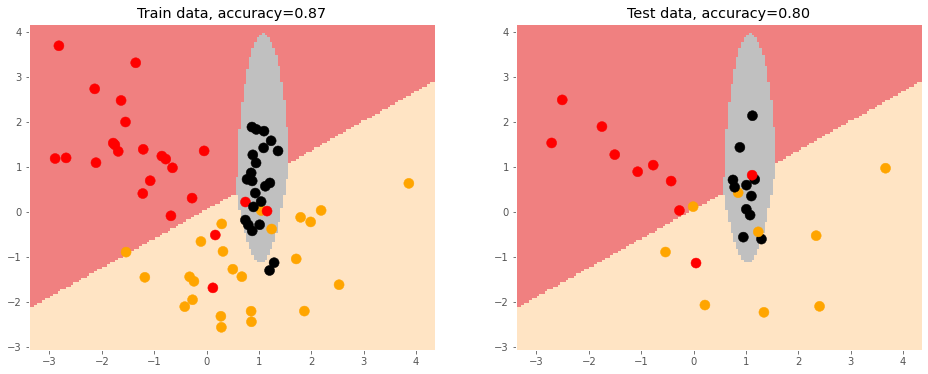

In [ ]:
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [ ]:
estimator.theta_

array([[-1.12548408,  1.14728805],
       [ 1.00154542,  0.58396415],
       [ 0.7580685 , -1.18192183]])

In [ ]:
estimator.sigma_

C:\Users\do6pb\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


array([[1.10302786, 1.3564884 ],
       [0.02990074, 0.81074094],
       [1.46716917, 0.79664852]])

C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,
C:\Users\do6pb\AppData\Local\Temp/ipykernel_10696/2318658699.py:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,


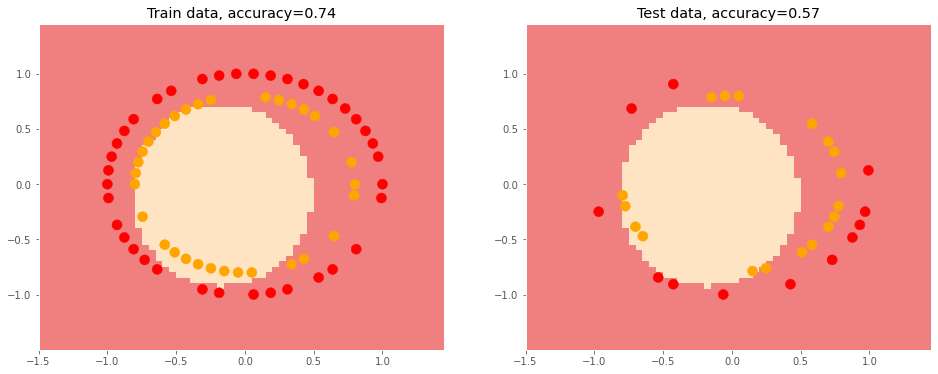

In [ ]:
estimator = naive_bayes.GaussianNB()#priors = [0.5, 0.5])

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    circles[0], 
    circles[1],
    test_size = 0.3,
    random_state = 0)  

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)